# Dimensionality Reduction on Country Data

This notebook implements PCA, t-SNE, and optional UMAP for dimensionality reduction on country socio-economic data.


## Section 1: Data Preparation


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [54]:
# Load the dataset
df = pd.read_csv('../data/Country-data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (167, 10)

First few rows:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [55]:
# Basic data inspection
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None

Missing values:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Basic statistics:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [56]:
# Handle missing values (if any)
print(f"Missing values before handling: {df.isnull().sum().sum()}")
df_clean = df.dropna()
print(f"Missing values after handling: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_clean.shape}")


Missing values before handling: 0
Missing values after handling: 0
Dataset shape after cleaning: (167, 10)


In [57]:
# Prepare data for modeling
countries = df_clean['country'].copy()
features = df_clean.drop('country', axis=1)

print("Features for modeling:")
print(features.columns.tolist())
print(f"\nFeature matrix shape: {features.shape}")


Features for modeling:
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Feature matrix shape: (167, 9)


In [58]:
# Normalize features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print("Scaled features statistics:")
print(features_scaled_df.describe())
print(f"\nScaled features shape: {features_scaled_df.shape}")


Scaled features statistics:
         child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -3.722904e-17  2.127373e-16  5.504579e-16  2.765585e-16 -7.977650e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean  -1.063687e-17  3.696311e-16  3.044803e-16  5.850277e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min 

## Section 2: Dimensionality Reduction


### (a) PCA (Principal Component Analysis)


In [59]:
# Compute covariance matrix
cov_matrix = np.cov(features_scaled.T)
print(f"Covariance matrix shape: {cov_matrix.shape}")

# Extract eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# Sort eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors shape: {eigenvectors.shape}")


Covariance matrix shape: (9, 9)

Eigenvalues: [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866 0.224928
 0.1141221  0.08884738 0.06727787]

Eigenvectors shape: (9, 9)


In [60]:
# Apply PCA using sklearn
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Explained variance by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print(f"\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {cum_var:.4f} ({cum_var*100:.2f}%)")


Explained variance by each component:
PC1: 0.4595 (45.95%)
PC2: 0.1718 (17.18%)
PC3: 0.1300 (13.00%)
PC4: 0.1105 (11.05%)
PC5: 0.0734 (7.34%)
PC6: 0.0248 (2.48%)
PC7: 0.0126 (1.26%)
PC8: 0.0098 (0.98%)
PC9: 0.0074 (0.74%)

Cumulative explained variance:
First 1 components: 0.4595 (45.95%)
First 2 components: 0.6313 (63.13%)
First 3 components: 0.7614 (76.14%)
First 4 components: 0.8719 (87.19%)
First 5 components: 0.9453 (94.53%)
First 6 components: 0.9702 (97.02%)
First 7 components: 0.9828 (98.28%)
First 8 components: 0.9926 (99.26%)
First 9 components: 1.0000 (100.00%)



Number of components needed for 90% variance: 5


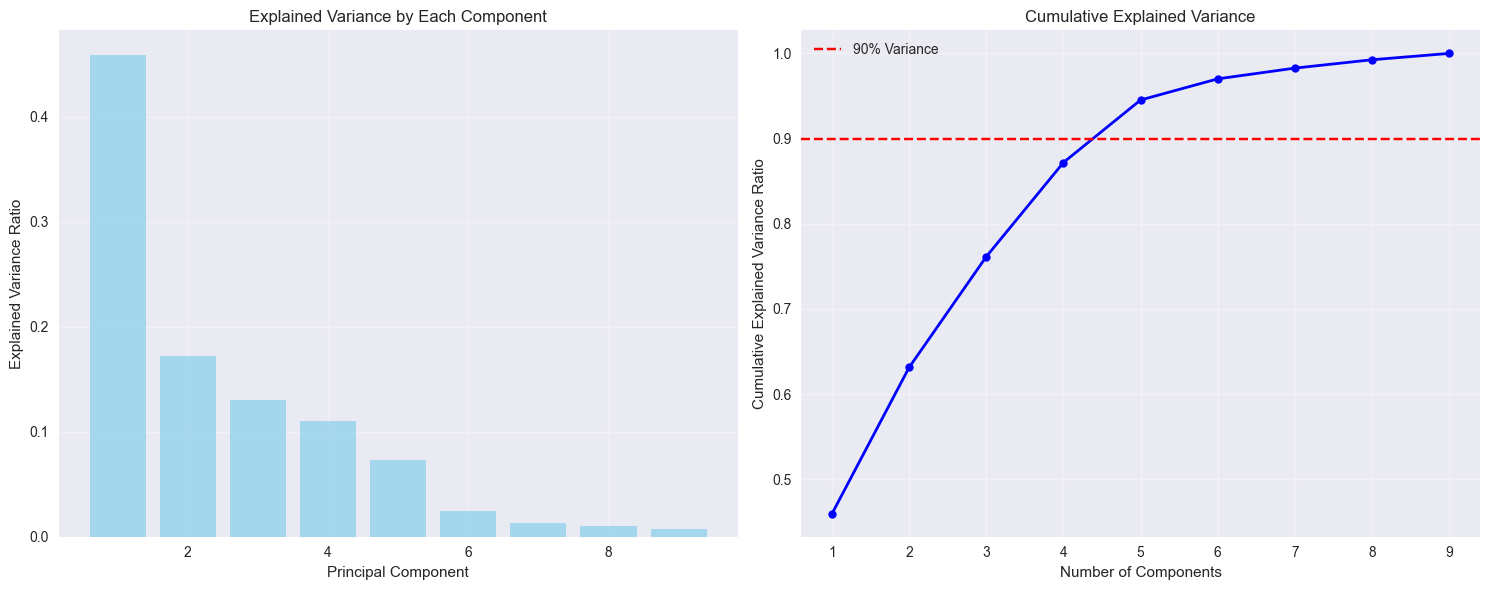

In [61]:
# Plot explained variance and cumulative variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Explained variance plot
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Each Component')
ax1.grid(True, alpha=0.3)

# Cumulative variance plot
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=6)
ax2.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()

# Find optimal number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"\nNumber of components needed for 90% variance: {n_components_90}")

# save the results
plt.savefig('../artifacts/figures/explained_variance_and_cumulative_variance.png', dpi=300, bbox_inches='tight')
plt.show()

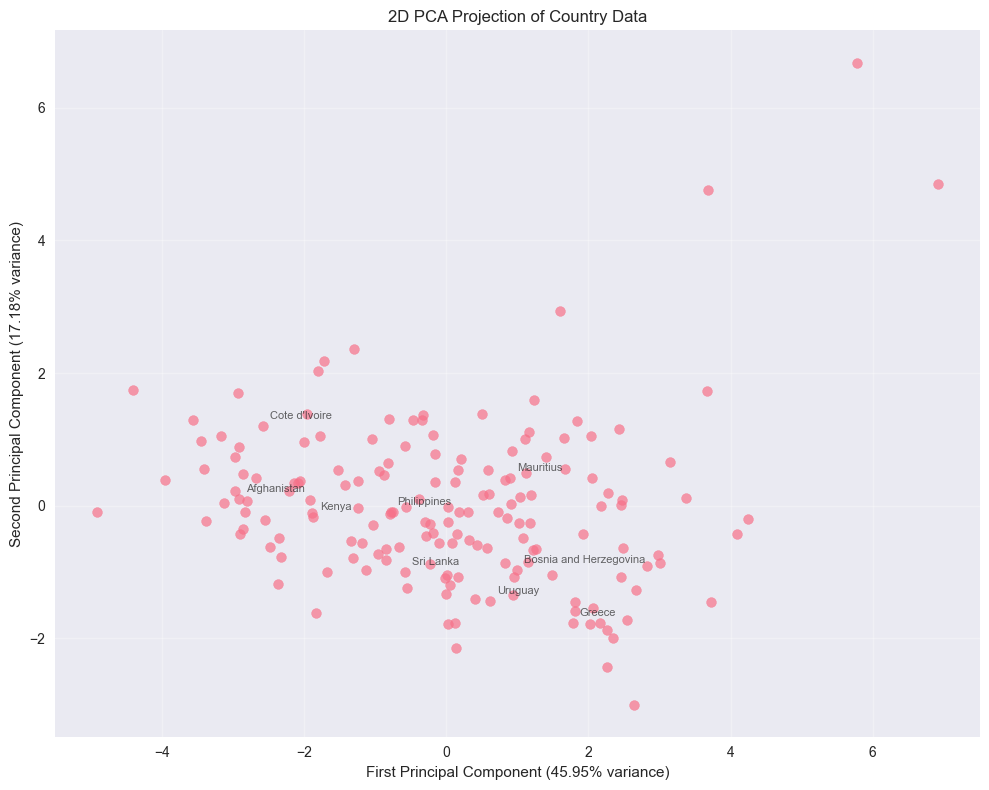

In [62]:
# 2D PCA projection
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(features_scaled)

# Create 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.7, s=50)
plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('2D PCA Projection of Country Data')
plt.grid(True, alpha=0.3)

# Add country labels for some points
for i, country in enumerate(countries):
    if i % 20 == 0:  # Label every 20th country to avoid overcrowding
        plt.annotate(country, (pca_2d_result[i, 0], pca_2d_result[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.tight_layout()

# save the results
plt.savefig('../artifacts/figures/2d_pca_projection.png', dpi=300, bbox_inches='tight')
plt.show()


Top contributing features for each principal component:

PC1 (explains 45.95% of variance):
  1. life_expec: 0.426
  2. child_mort: -0.420
  3. total_fer: -0.404
  4. income: 0.398
  5. gdpp: 0.393

PC2 (explains 17.18% of variance):
  1. imports: 0.672
  2. exports: 0.613
  3. health: -0.243
  4. life_expec: -0.223
  5. child_mort: 0.193


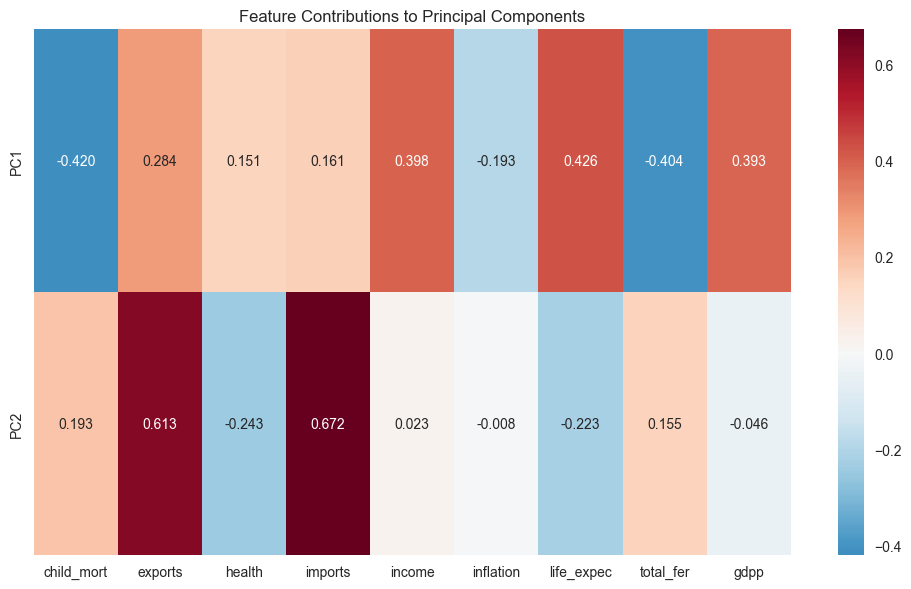

In [63]:
# Analyze top contributing features for each component
feature_names = features.columns
components = pca_2d.components_

print("Top contributing features for each principal component:")
for i, component in enumerate(components):
    print(f"\nPC{i+1} (explains {pca_2d.explained_variance_ratio_[i]:.2%} of variance):")
    # Get absolute values and sort
    feature_importance = np.abs(component)
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    for j in range(min(5, len(feature_names))):
        idx = sorted_idx[j]
        print(f"  {j+1}. {feature_names[idx]}: {component[idx]:.3f}")

# Create feature importance heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(components, 
            xticklabels=feature_names, 
            yticklabels=[f'PC{i+1}' for i in range(len(components))],
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f')
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()

# save the results
plt.savefig('../artifacts/figures/feature_importance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


### (b) t-SNE (t-Distributed Stochastic Neighbor Embedding)


In [64]:
# Apply t-SNE with different parameter combinations
perplexity_values = [5, 30, 70]
learning_rates = [10, 100, 1000]
n_iter_values = [250, 1000, 10000]

# Create grid of parameters
param_combinations = []
for perp in perplexity_values:
    for lr in learning_rates:
        for n_iter in n_iter_values:
            param_combinations.append((perp, lr, n_iter))

print(f"Total parameter combinations: {len(param_combinations)}")
print("Parameter combinations:")
for i, (perp, lr, n_iter) in enumerate(param_combinations):
    print(f"{i+1}. Perplexity: {perp}, Learning Rate: {lr}, Iterations: {n_iter}")


Total parameter combinations: 27
Parameter combinations:
1. Perplexity: 5, Learning Rate: 10, Iterations: 250
2. Perplexity: 5, Learning Rate: 10, Iterations: 1000
3. Perplexity: 5, Learning Rate: 10, Iterations: 10000
4. Perplexity: 5, Learning Rate: 100, Iterations: 250
5. Perplexity: 5, Learning Rate: 100, Iterations: 1000
6. Perplexity: 5, Learning Rate: 100, Iterations: 10000
7. Perplexity: 5, Learning Rate: 1000, Iterations: 250
8. Perplexity: 5, Learning Rate: 1000, Iterations: 1000
9. Perplexity: 5, Learning Rate: 1000, Iterations: 10000
10. Perplexity: 30, Learning Rate: 10, Iterations: 250
11. Perplexity: 30, Learning Rate: 10, Iterations: 1000
12. Perplexity: 30, Learning Rate: 10, Iterations: 10000
13. Perplexity: 30, Learning Rate: 100, Iterations: 250
14. Perplexity: 30, Learning Rate: 100, Iterations: 1000
15. Perplexity: 30, Learning Rate: 100, Iterations: 10000
16. Perplexity: 30, Learning Rate: 1000, Iterations: 250
17. Perplexity: 30, Learning Rate: 1000, Iterations:

Running t-SNE with perplexity=5, learning_rate=10, n_iter=250...
Running t-SNE with perplexity=5, learning_rate=10, n_iter=1000...
Running t-SNE with perplexity=5, learning_rate=10, n_iter=10000...
Running t-SNE with perplexity=5, learning_rate=100, n_iter=250...
Running t-SNE with perplexity=5, learning_rate=100, n_iter=1000...
Running t-SNE with perplexity=5, learning_rate=100, n_iter=10000...
Running t-SNE with perplexity=5, learning_rate=1000, n_iter=250...
Running t-SNE with perplexity=5, learning_rate=1000, n_iter=1000...
Running t-SNE with perplexity=5, learning_rate=1000, n_iter=10000...
Running t-SNE with perplexity=30, learning_rate=10, n_iter=250...
Running t-SNE with perplexity=30, learning_rate=10, n_iter=1000...
Running t-SNE with perplexity=30, learning_rate=10, n_iter=10000...
Running t-SNE with perplexity=30, learning_rate=100, n_iter=250...
Running t-SNE with perplexity=30, learning_rate=100, n_iter=1000...
Running t-SNE with perplexity=30, learning_rate=100, n_iter=1

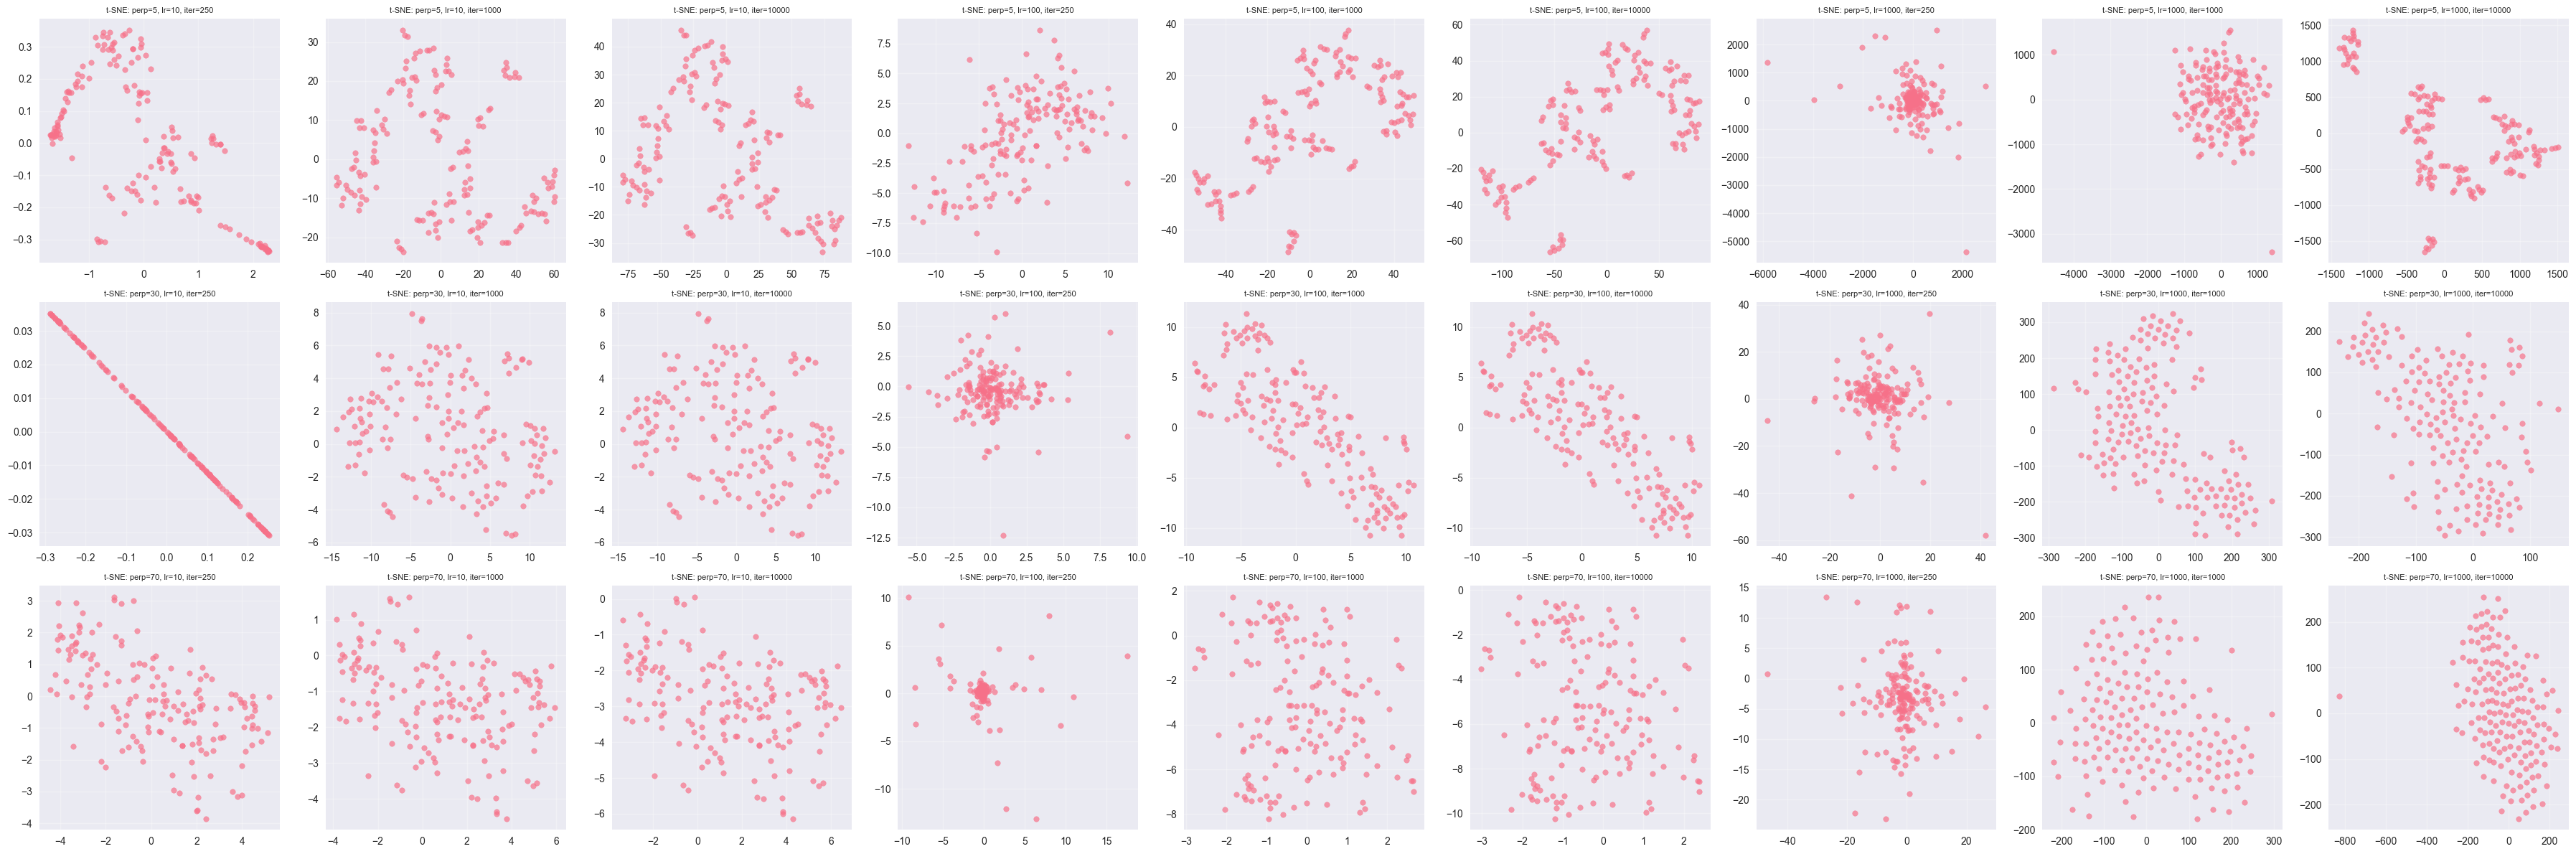

In [65]:
# Apply t-SNE with different parameters and visualize
# Create a 3x9 grid to accommodate all 27 combinations
fig, axes = plt.subplots(3, 9, figsize=(36, 12))
axes = axes.ravel()

tsne_results = {}

for i, (perp, lr, n_iter) in enumerate(param_combinations):
    print(f"Running t-SNE with perplexity={perp}, learning_rate={lr}, n_iter={n_iter}...")
    
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate=lr, max_iter=n_iter, random_state=42)
    tsne_result = tsne.fit_transform(features_scaled)
    tsne_results[(perp, lr, n_iter)] = tsne_result
    
    # Plot
    axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, s=30)
    axes[i].set_title(f't-SNE: perp={perp}, lr={lr}, iter={n_iter}', fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()

# save the results
plt.savefig('../artifacts/figures/tsne_results.png', dpi=300, bbox_inches='tight')
plt.show()

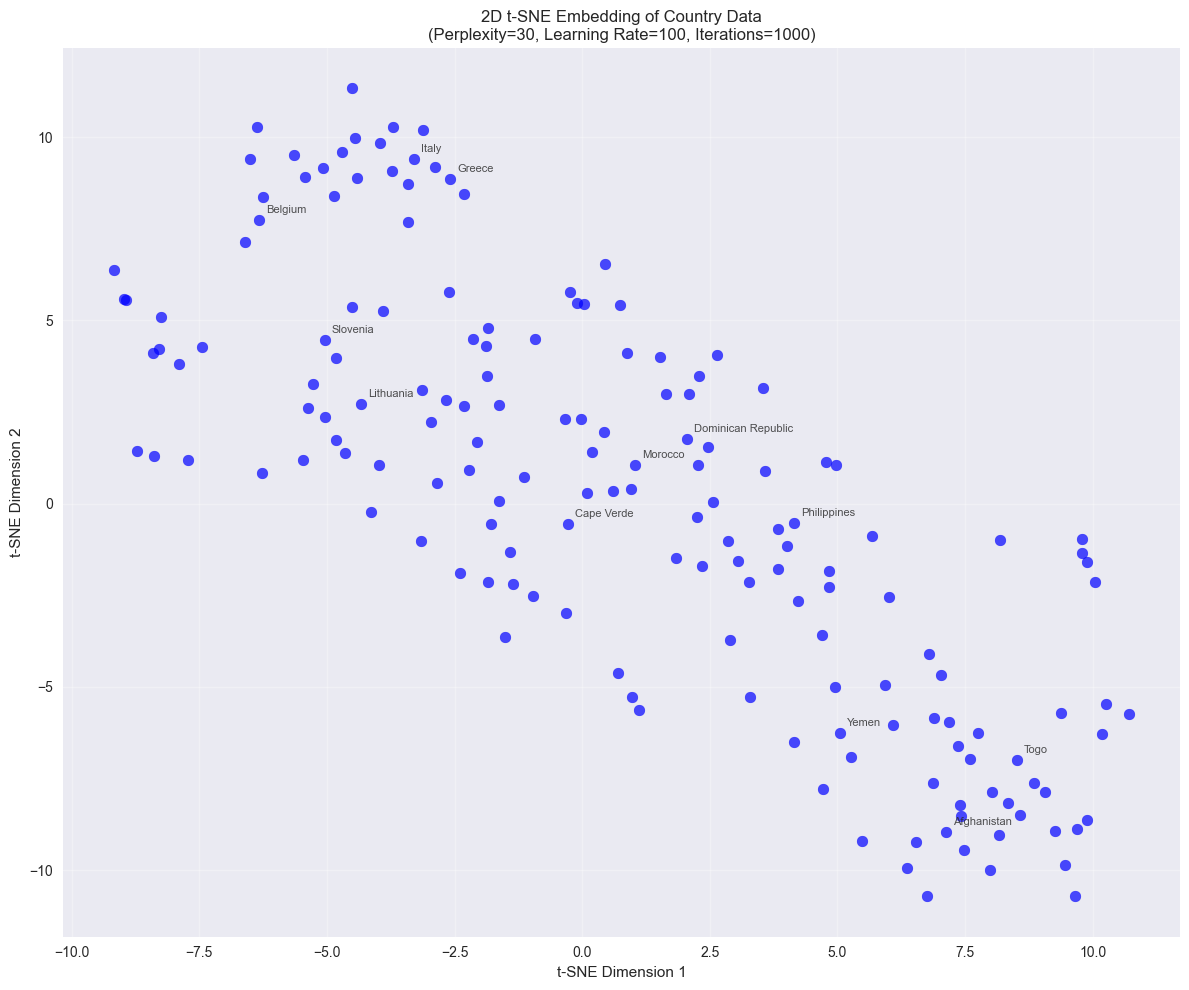

t-SNE Results:
- Captures non-linear relationships in the data
- Preserves local neighborhood structure
- Reveals clusters that may not be visible in PCA
- Good for identifying countries with similar socio-economic patterns


In [66]:
# Select best t-SNE result (using perplexity=30, learning_rate=100, max_iter=1000)
best_tsne = TSNE(n_components=2, perplexity=30, learning_rate=100, max_iter=1000, random_state=42)
tsne_2d = best_tsne.fit_transform(features_scaled)

# Create detailed 2D scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], alpha=0.7, s=60, c='blue')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D t-SNE Embedding of Country Data\n(Perplexity=30, Learning Rate=100, Iterations=1000)')
plt.grid(True, alpha=0.3)

# Add country labels for some points
for i, country in enumerate(countries):
    if i % 15 == 0:  # Label every 15th country
        plt.annotate(country, (tsne_2d[i, 0], tsne_2d[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.tight_layout()

# save the results
plt.savefig('../artifacts/figures/tsne_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("t-SNE Results:")
print(f"- Captures non-linear relationships in the data")
print(f"- Preserves local neighborhood structure")
print(f"- Reveals clusters that may not be visible in PCA")
print(f"- Good for identifying countries with similar socio-economic patterns")


### (c) Optional Bonus – UMAP (Uniform Manifold Approximation and Projection)


In [67]:

try:
    import umap
    print("UMAP successfully imported!")
except ImportError:
    print("UMAP not available. Install with: pip install umap-learn")
    umap = None


UMAP successfully imported!


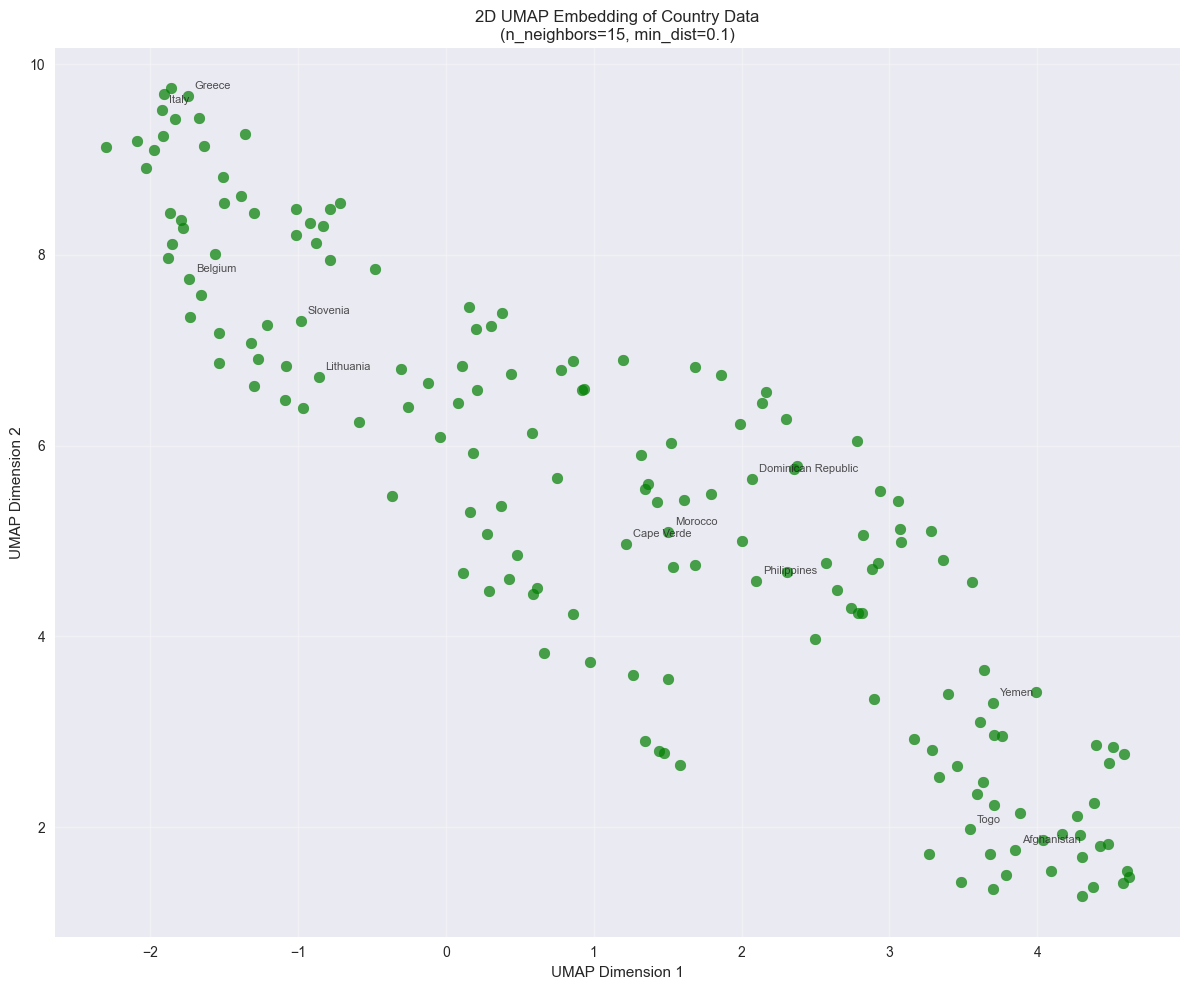

UMAP Results:
- Faster than t-SNE for large datasets
- Better preserves both local and global structure
- More stable results across different runs
- Good balance between speed and quality


In [68]:
if umap is not None:
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    umap_2d = umap_reducer.fit_transform(features_scaled)
    
    # Create UMAP visualization
    plt.figure(figsize=(12, 10))
    plt.scatter(umap_2d[:, 0], umap_2d[:, 1], alpha=0.7, s=60, c='green')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.title('2D UMAP Embedding of Country Data\n(n_neighbors=15, min_dist=0.1)')
    plt.grid(True, alpha=0.3)
    
    # Add country labels for some points
    for i, country in enumerate(countries):
        if i % 15 == 0:  # Label every 15th country
            plt.annotate(country, (umap_2d[i, 0], umap_2d[i, 1]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)
    
    plt.tight_layout()

    # save the results
    plt.savefig('../artifacts/figures/umap_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("UMAP Results:")
    print(f"- Faster than t-SNE for large datasets")
    print(f"- Better preserves both local and global structure")
    print(f"- More stable results across different runs")
    print(f"- Good balance between speed and quality")
else:
    print("UMAP not available. Skipping UMAP implementation.")


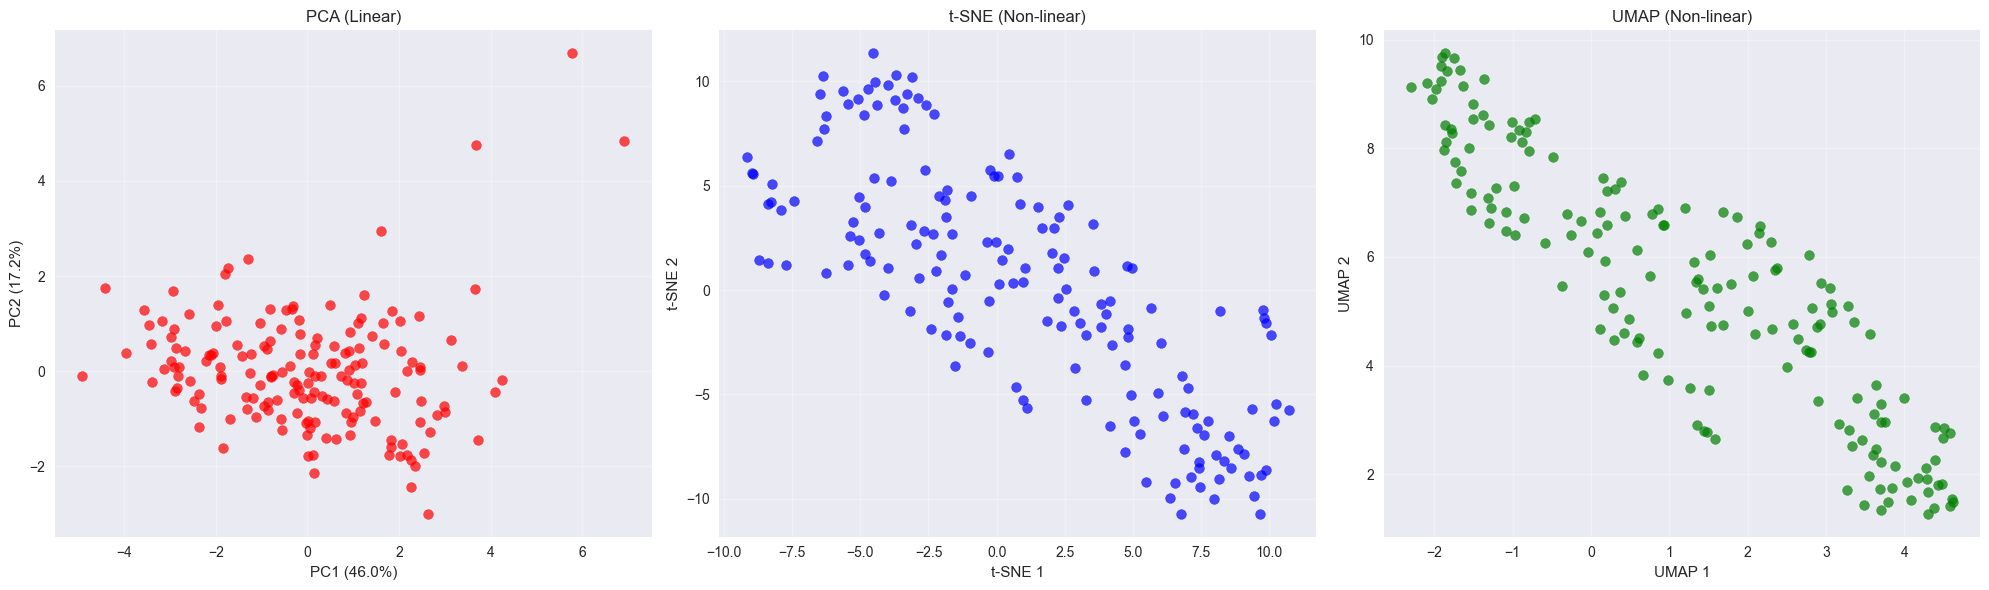


Comparison of Dimensionality Reduction Methods:
1. PCA: Linear transformation, preserves global structure, fast
2. t-SNE: Non-linear, preserves local neighborhoods, slower
3. UMAP: Non-linear, balances local and global structure, faster than t-SNE


In [69]:
# Compare all dimensionality reduction methods
if umap is not None:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # PCA
    axes[0].scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.7, s=50, c='red')
    axes[0].set_title('PCA (Linear)')
    axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
    axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
    axes[0].grid(True, alpha=0.3)
    
    # t-SNE
    axes[1].scatter(tsne_2d[:, 0], tsne_2d[:, 1], alpha=0.7, s=50, c='blue')
    axes[1].set_title('t-SNE (Non-linear)')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')
    axes[1].grid(True, alpha=0.3)
    
    # UMAP
    axes[2].scatter(umap_2d[:, 0], umap_2d[:, 1], alpha=0.7, s=50, c='green')
    axes[2].set_title('UMAP (Non-linear)')
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nComparison of Dimensionality Reduction Methods:")
    print("1. PCA: Linear transformation, preserves global structure, fast")
    print("2. t-SNE: Non-linear, preserves local neighborhoods, slower")
    print("3. UMAP: Non-linear, balances local and global structure, faster than t-SNE")
else:
    # Compare PCA and t-SNE only
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # PCA
    axes[0].scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.7, s=50, c='red')
    axes[0].set_title('PCA (Linear)')
    axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
    axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
    axes[0].grid(True, alpha=0.3)
    
    # t-SNE
    axes[1].scatter(tsne_2d[:, 0], tsne_2d[:, 1], alpha=0.7, s=50, c='blue')
    axes[1].set_title('t-SNE (Non-linear)')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()

    # save the results
    plt.savefig('../artifacts/figures/Compare_all_dimensionality_reduction_methods.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nComparison of Dimensionality Reduction Methods:")
    print("1. PCA: Linear transformation, preserves global structure, fast")
    print("2. t-SNE: Non-linear, preserves local neighborhoods, slower")


## Summary and Insights

### Key Findings:

1. **PCA Analysis**:
   - First 2 components explain significant variance in the data
   - Linear relationships captured effectively
   - Good for understanding global structure

2. **t-SNE Analysis**:
   - Reveals non-linear patterns and clusters
   - Better neighborhood preservation
   - Useful for identifying similar countries

3. **UMAP Analysis** (if implemented):
   - Faster than t-SNE
   - Better balance of local and global structure
   - More stable results